<div style="color: white; background-color: #1A3C5A; font-size: 28px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
20px; border-radius: 20px;"> 
PREDCTIVE ANALYTICS OF HR DATASET
</div>

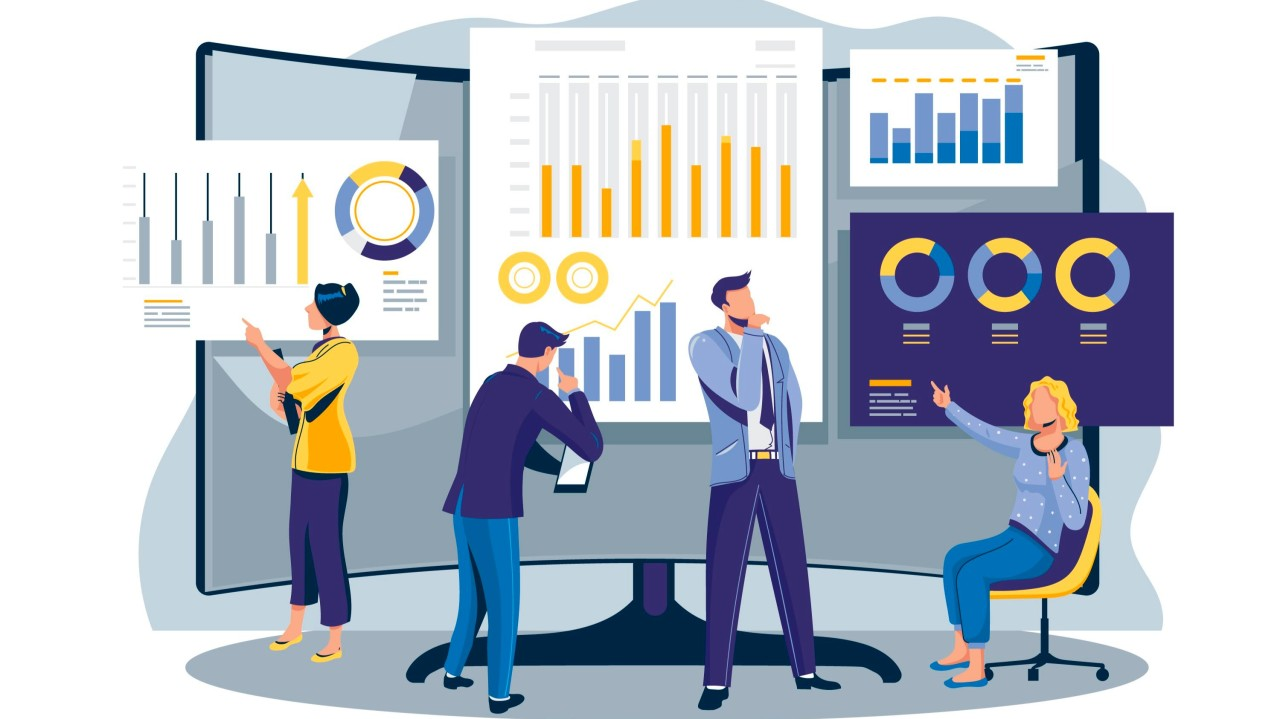

<h3 style="font-weight: bold; color: darkblue;">Overview : </h3>
This project leverages predictive analytics on HR data to forecast employee attrition and guide retention strategies. By analyzing employee demographics, satisfaction, and compensation details, the project identifies key factors influencing turnover and applies machine learning models—particularly Random Forest, which achieved high predictive accuracy—to assess attrition risk. The resulting insights help HR departments make data-driven decisions, improve employee retention, and proactively address workforce challenges

<h3 style="font-weight: bold; color: darkblue;">About the Dataset : </h3>
The dataset used in this project is the well-known IBM HR Analytics Employee Attrition and Performance dataset, consisting of 1,470 records with 35 columns. It covers a broad range of employee details such as age, gender, education, job role, department, monthly income, job satisfaction, environment satisfaction, years at the company, training times, work-life balance, and more. The attrition rate is about 16.1%, with 237 employees who left out of 1,470. The dataset is balanced for no missing values and contains both numerical and categorical variables, making it suitable for predictive modeling and workforce analysis. It provides a rich source of information for understanding attrition factors and training machine learning models to predict employee turnover. This dataset is widely used for HR analytics and attrition prediction challenges due to its comprehensive feature set and quality data.

<h3 style="font-weight: bold; color: darkblue;"> Introduction</h3>
This project addresses the critical issue of employee attrition,Employee attrition is when employees leave a company for various reasons like resignation, retirement, or layoffs, and their positions are not immediately filled or eliminated altogether. It is a natural process that causes a gradual reduction in the workforce size over time. Unlike employee turnover, which measures how often employees leave and are replaced, attrition focuses on the net decrease in staff numbers. Understanding attrition is important because high attrition rates can signal problems like low job satisfaction, poor management, or inadequate pay, which can hurt productivity. By managing attrition effectively, organizations can improve employee retention and create a more stable and motivated workforce.

<h3 style="font-weight: bold; color: darkblue;"> Purpose of the Project</h3>
Employee attrition means when employees leave a company and their jobs are not immediately filled. This happens naturally in all businesses and can be for many reasons, like retirement, finding a new job, or changes in the company. Sometimes, employees leave on their own, and other times, the company may let them go. High attrition can create challenges like lost knowledge and extra costs for hiring and training new people. Understanding attrition helps companies plan better, keep their best employees, and make the workplace more appealing. This way, they can avoid losing important staff and maintain smooth operations.

ca.indeed.com favicon
ca

<h3 style="font-weight: bold; color: darkblue;">Importing libraries </h3>

In [1]:
import pandas as pd
# Used for data manipulation and analysis (reading, cleaning, and handling datasets using DataFrames)

import numpy as np
# Used for numerical and mathematical operations, handling arrays and performing fast calculations

import seaborn as sns
# Used for creating advanced and attractive statistical visualizations (heatmaps, pairplots, etc.)

import matplotlib.pyplot as plt
# Used for creating basic plots and visualizations (bar charts, line graphs, histograms, etc.)

%matplotlib inline
# Displays matplotlib plots directly below code cells in Jupyter Notebook

from sklearn.preprocessing import LabelEncoder
# Converts categorical (text) data into numeric form for machine learning models

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import  StandardScaler
# Scales numerical features while handling outliers using median and interquartile range

from sklearn.model_selection import train_test_split
# Splits dataset into training and testing parts to evaluate model performance

from sklearn.metrics import accuracy_score
# Measures how accurate the model predictions are by comparing predicted vs actual values

from sklearn.ensemble import RandomForestClassifier
# A machine learning algorithm that uses multiple decision trees for robust and accurate classification

from xgboost import XGBClassifier
# A powerful and efficient gradient boosting algorithm for classification tasks, known for high accuracy

import warnings
# Used to manage or suppress warning messages

warnings.filterwarnings('ignore')

<div style="color: white; background-color: #1A3C5A; font-size: 28px; font-weight: bold; text-align: center; padding: 20px; border-radius: 20px;"> Data Loading </div>

In [2]:
data=pd.read_csv(r"C:\Users\User\OneDrive\FINAL_PROJECT\FINAL_PROJECTS\HR.csv")

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<div style="color: white; background-color: #1A3C5A; font-size: 28px; font-weight: bold; text-align: center; padding: 20px; border-radius: 20px;"> Descriptive Analysis</div>

In [8]:
data.head(7).T

,0,1,2,3,4,5,6
Age,41,49,37,33,27,32,59
Attrition,Yes,No,Yes,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591,1005,1324
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2,2,3
Education,2,1,2,4,1,2,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical
EmployeeCount,1,1,1,1,1,1,1
EmployeeNumber,1,2,4,5,7,8,10


In [10]:
data.tail(8).T

,1462,1463,1464,1465,1466,1467,1468,1469
Age,39,31,26,36,39,27,49,34
Attrition,No,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,722,325,1167,884,613,155,1023,628
Department,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,24,5,5,23,6,4,2,8
Education,1,3,3,2,1,3,3,3
EducationField,Marketing,Medical,Other,Medical,Medical,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1,1,1,1
EmployeeNumber,2056,2057,2060,2061,2062,2064,2065,2068


<h3 style="font-weight: bold; color: darkblue;">Data Information</h3>

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<h3 style="font-weight: bold; color: darkblue;">Data Description</h3>

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


<h3 style="font-weight: bold; color: darkblue;">Checking Data Type</h3>

In [16]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

<h3 style="font-weight: bold; color: darkblue;">Checking Number of unique values</h3>

In [18]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [20]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [22]:
data.size

51450

In [24]:
data.shape

(1470, 35)

<h3 style="font-weight: bold; color: darkblue;">Displaying Unique Values</h3>

In [26]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print("-"*50)
    print("\n")

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
--------------------------------------------------


Attrition
['Yes' 'No']
--------------------------------------------------


BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
--------------------------------------------------


DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  7

<div style="color: white; background-color: #1A3C5A; font-size: 28px; font-weight: bold; text-align: center; padding: 20px; border-radius: 20px;"> Data Cleaning and Preprocessing </div>

In [28]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [30]:
data.duplicated().sum()

0

In [32]:
num_cols=data.select_dtypes(include="number")

In [34]:
num_cols

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


<h3 style="font-weight: bold; color: darkblue;">Outlier detection</h3>

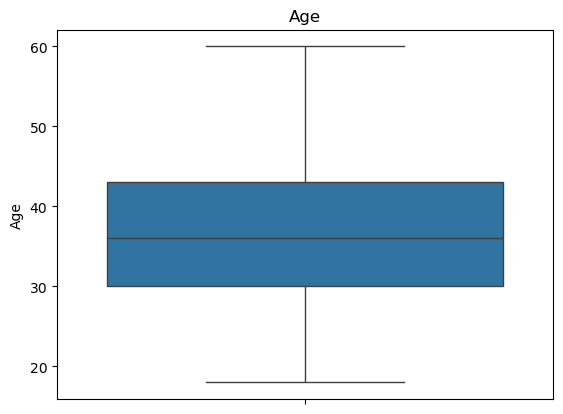

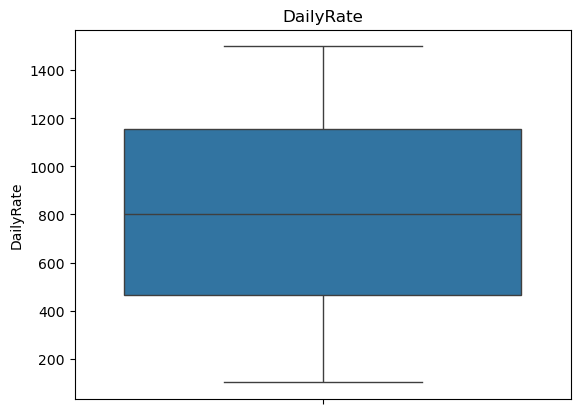

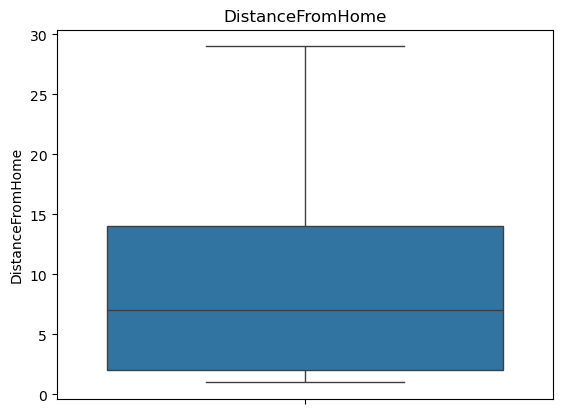

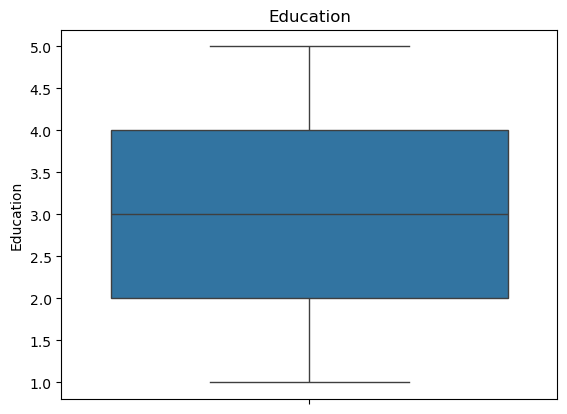

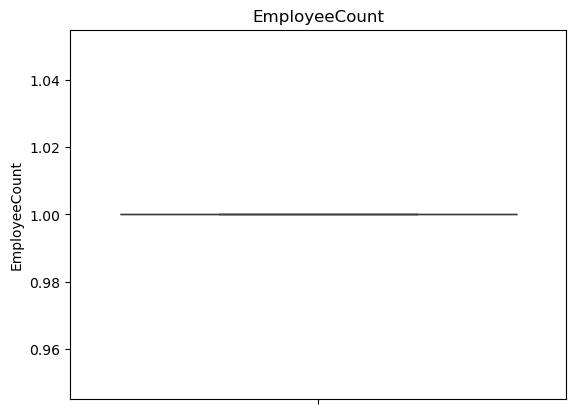

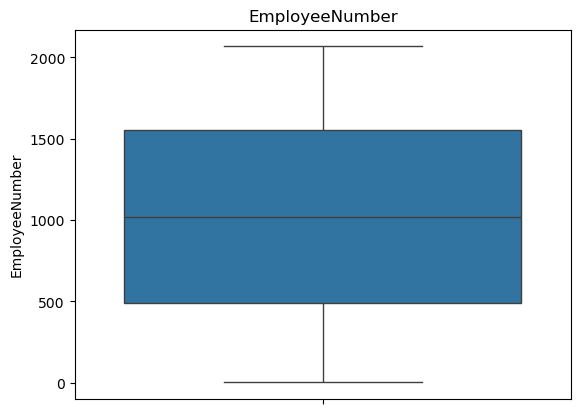

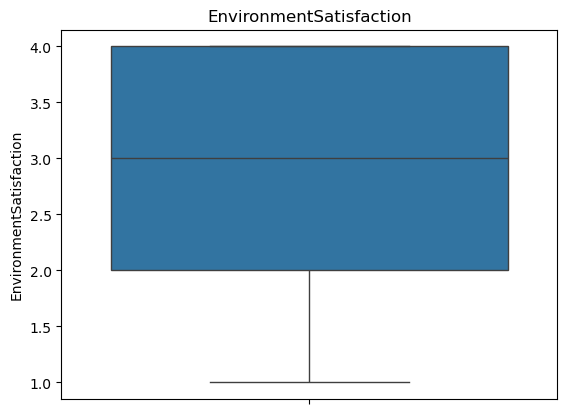

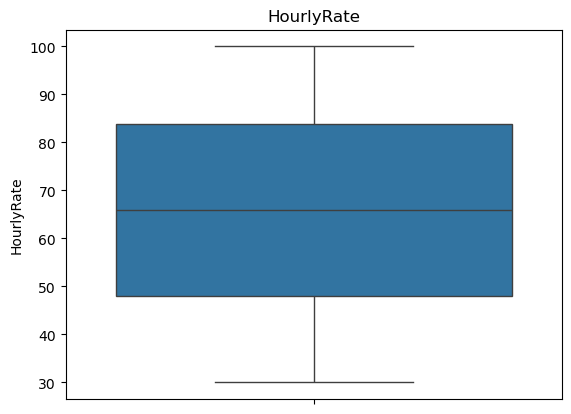

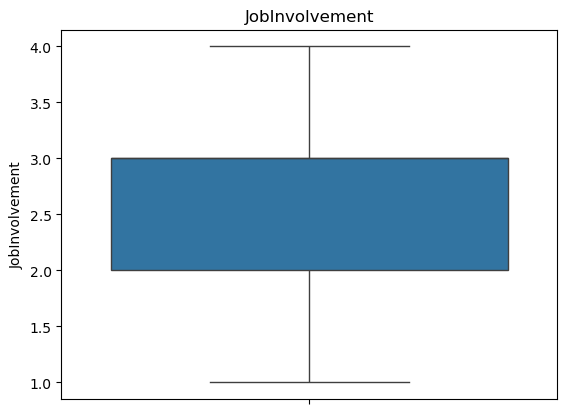

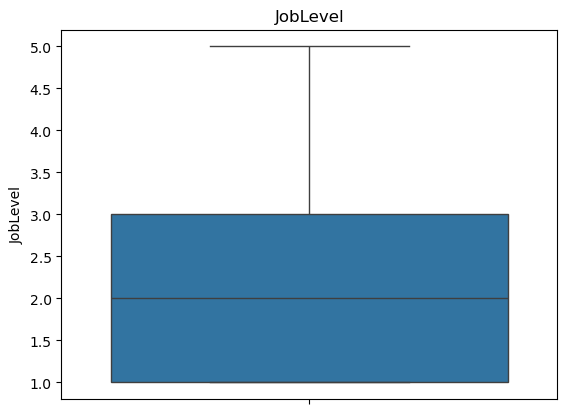

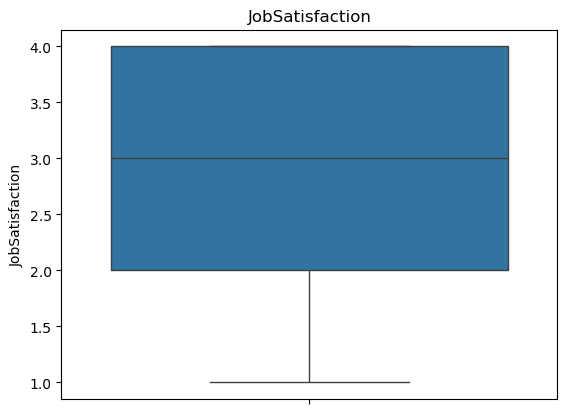

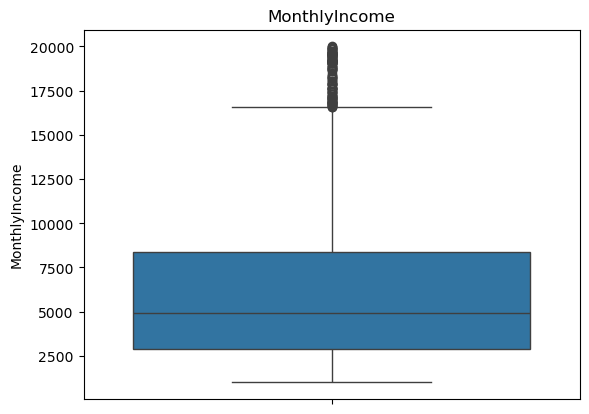

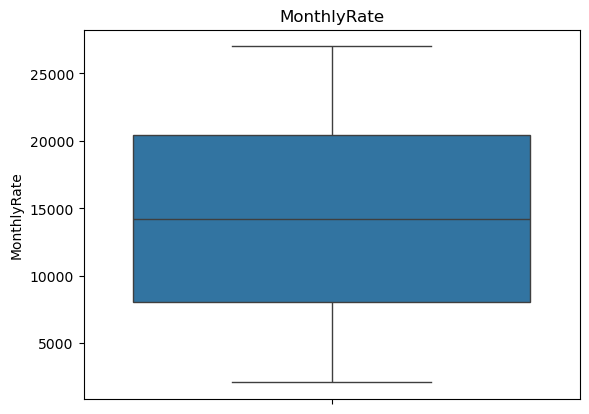

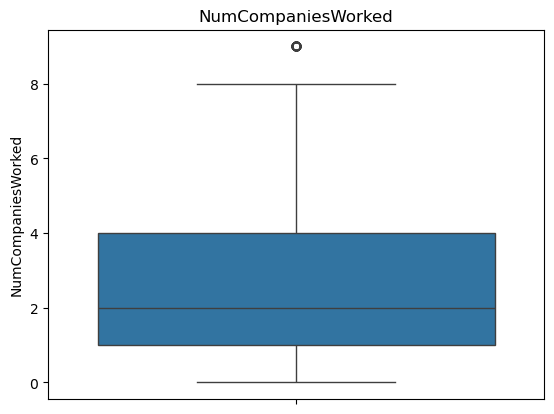

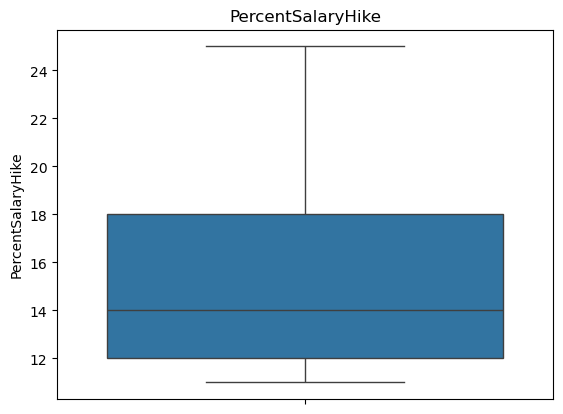

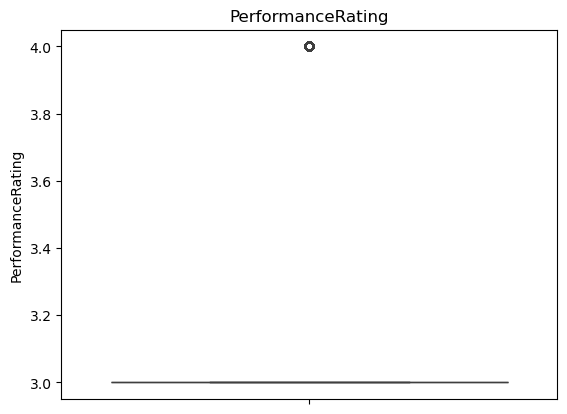

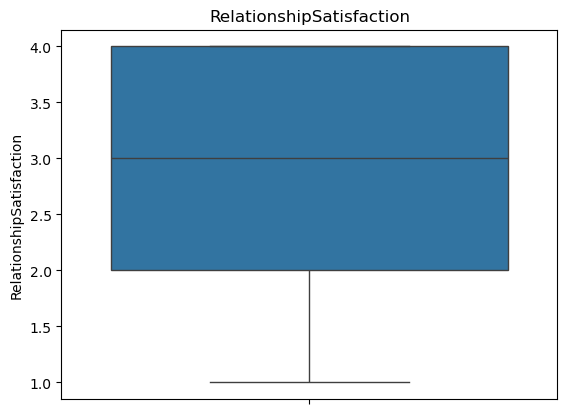

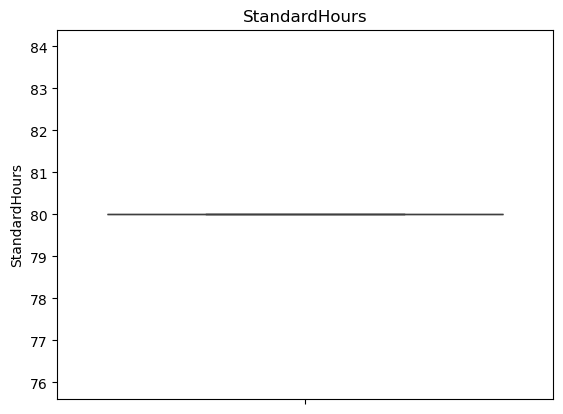

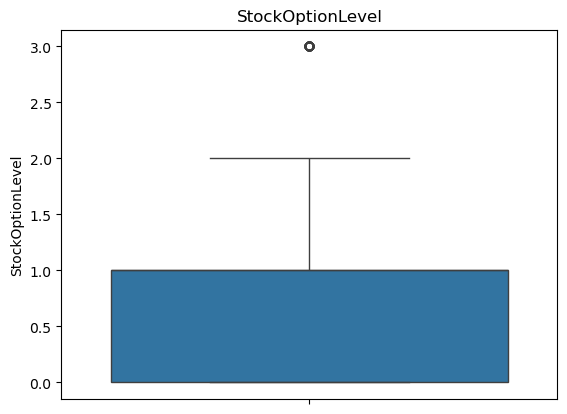

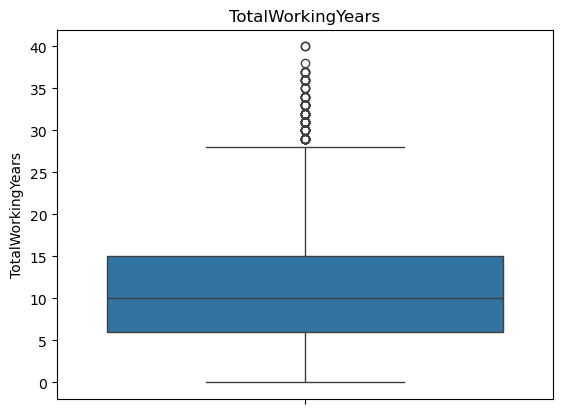

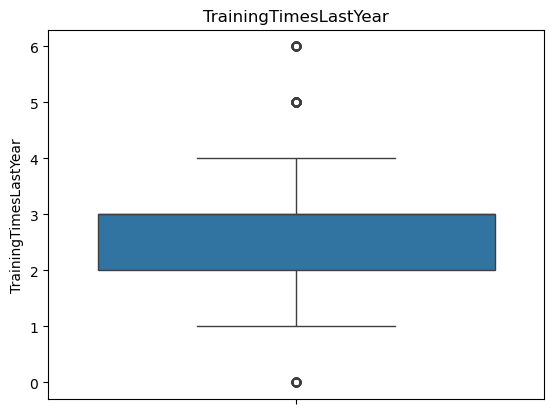

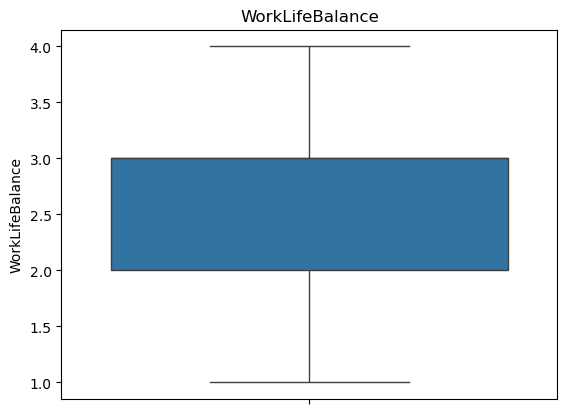

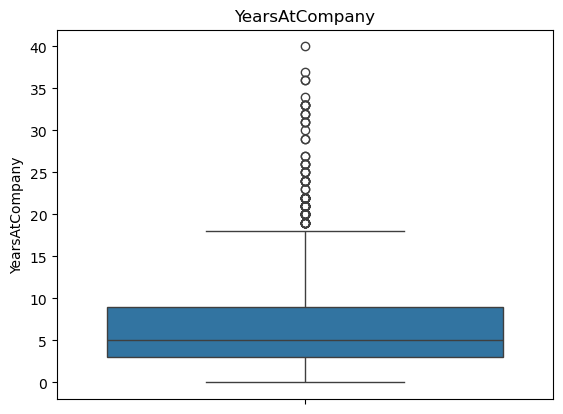

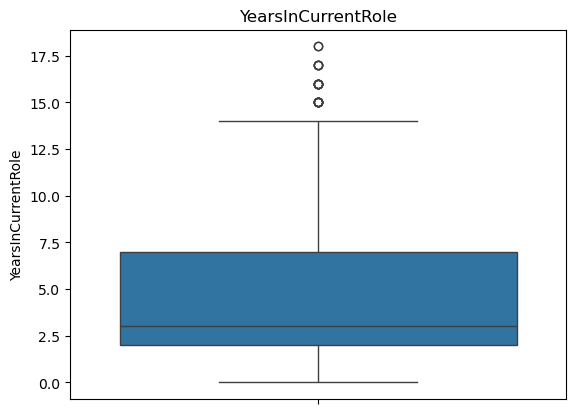

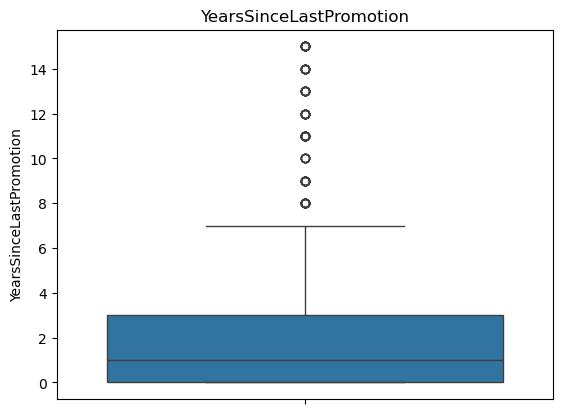

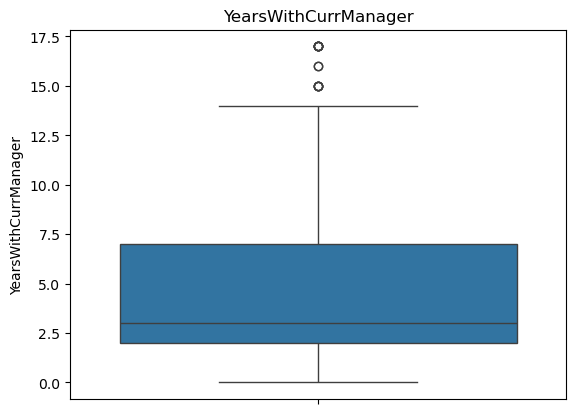

In [36]:
for  i in num_cols:
    plt.title(i)
    sns.boxplot(data[i])
    plt.show()

<h3 style="font-weight: bold; color: darkblue;">Outleir handling</h3>

In [ ]:
out_cols=['MonthlyIncome' ,'NumCompaniesWorked','PerformanceRating','StockOptionLevel',
'TotalWorkingYears' ,'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole' ,'YearsSinceLastPromotion' , 'YearsWithCurrManager'   ]

In [ ]:
for col in out_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR= Q3 - Q1
    lower = Q1 - 1.5 *  IQR
    upper = Q3 + 1.5 *  IQR
    data[col] = np.clip(data[col],lower ,upper)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

<div style="color: white; background-color: #1A3C5A; font-size: 28px; font-weight: bold; text-align: center; padding: 20px; border-radius: 20px;"> Exploratory Data Analysis(EDA)</div>

## Histplot

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64


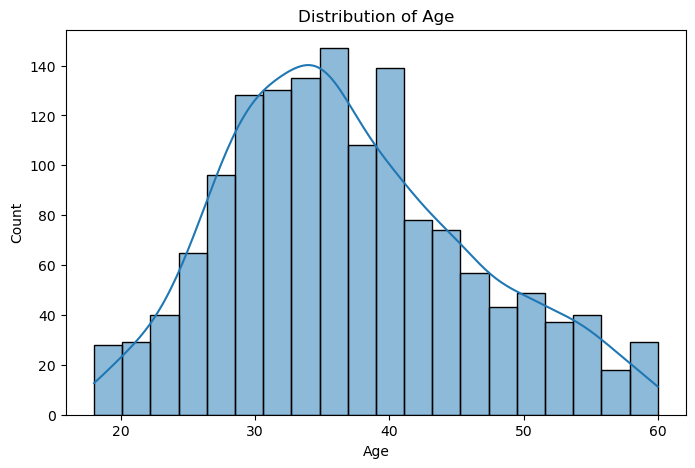

In [37]:
print(data['Age'].describe())

# Histogram of Age
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Pie chart

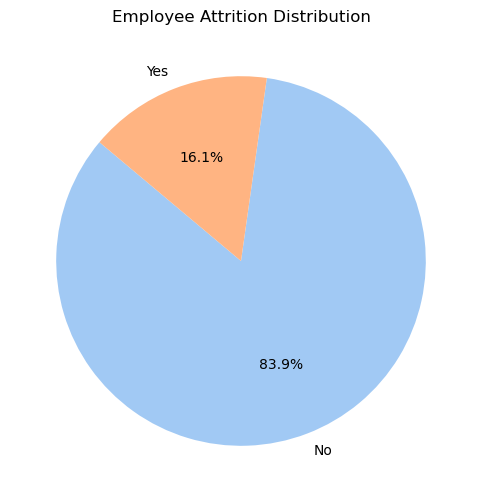

In [40]:
# Data for pie chart - example: counts of Attrition categories
attrition_counts = data['Attrition'].value_counts()

# Define color palette
colors = sns.color_palette('pastel')[0:len(attrition_counts)]

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(attrition_counts, labels=attrition_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Employee Attrition Distribution')
plt.show()

## countplot

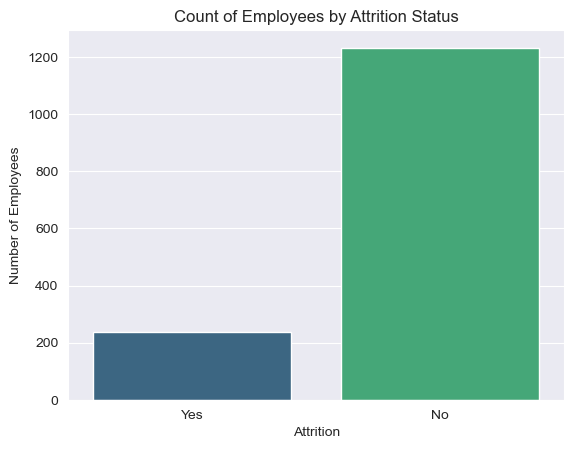

In [42]:
# Set the style for the plot
sns.set_style('darkgrid')

# Plotting bar plot for Attrition counts
sns.countplot(x='Attrition', data=data, palette='viridis')

# Add title and labels
plt.title('Count of Employees by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')

# Show the plot
plt.show()

<h3 style="font-weight: bold; color: darkblue;">Encoding</h3>

In [44]:
# Encode categorical variables 
#Converting data from one format to a different format to make it readable, storable, or usable.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [46]:
df = data.copy

In [50]:
df(3).T

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Age,41,49,37,33,27,32,59,30,38,36,...,29,50,39,31,26,36,39,27,49,34
Attrition,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
BusinessTravel,2,1,2,1,2,1,2,2,1,2,...,2,2,2,0,2,1,2,2,1,2
DailyRate,1102,279,1373,1392,591,1005,1324,1358,216,1299,...,468,410,722,325,1167,884,613,155,1023,628
Department,2,1,1,1,1,1,1,1,1,1,...,1,2,2,1,2,1,1,1,2,1
DistanceFromHome,1,8,2,3,2,2,3,24,23,27,...,28,28,24,5,5,23,6,4,2,8
Education,2,1,2,4,1,2,3,1,3,3,...,4,3,1,3,3,2,1,3,3,3
EducationField,1,1,4,1,3,1,3,1,1,3,...,3,2,2,3,4,3,3,1,3,3
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,1,2,4,5,7,8,10,11,12,13,...,2054,2055,2056,2057,2060,2061,2062,2064,2065,2068


In [52]:
df().shape

(1470, 35)

<h3 style="font-weight: bold; color: darkblue;">Scaling</h3>

In [61]:

from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your original DataFrame
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)  # shape: (n_samples, n_features)

# Fix: use data.columns instead of just 'columns=data'
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

In [63]:
scaled_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2.280906,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,0.0,-1.701283,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.438422,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.0,-1.699621,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,2.280906,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,0.0,-1.696298,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.438422,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,0.0,-1.694636,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.438422,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,0.0,-1.691313,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.438422,-0.913194,0.202082,-0.493817,1.703764,-0.891688,0.565311,0.0,1.721670,...,0.266233,0.0,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,-0.438422,0.590048,-0.469754,-0.493817,-0.393938,-1.868426,0.565311,0.0,1.723332,...,-1.584178,0.0,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,-0.438422,0.590048,-1.605183,-0.493817,-0.640727,0.085049,-0.937414,0.0,1.726655,...,-0.658973,0.0,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,-0.438422,-0.913194,0.546677,1.401512,-0.887515,0.085049,0.565311,0.0,1.728317,...,1.191438,0.0,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


<h3 style="font-weight: bold; color: darkblue;">Model building</h3>

### splitting data  to Train&Test 

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume you have a pandas DataFrame 'data with features and 'target' column
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## DecisionTreeClassifier

In [67]:
# Build and train the decision tree model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt_clf.predict(X_test)
print('Decision Tree accuracy:', accuracy_score(y_test, y_pred))

Decision Tree accuracy: 0.7653061224489796



## RandomForestClassifier


In [69]:
# Build and train the random forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test)
print('Random Forest accuracy:', accuracy_score(y_test, y_pred_rf))

Random Forest accuracy: 0.8673469387755102


## Final prediction

In [71]:
df()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [73]:
df().sample(5).T

,1429,1433,449,1162,429
Age,39,25,39,35,46
Attrition,0,0,0,1,0
BusinessTravel,2,2,1,2,2
DailyRate,116,1382,443,737,1009
Department,1,2,1,2,1
DistanceFromHome,24,8,8,10,2
Education,1,2,1,3,3
EducationField,1,4,1,3,1
EmployeeCount,1,1,1,1,1
EmployeeNumber,2014,2018,602,1639,575


In [75]:
row_index = 327 
row_values = df().loc[row_index]
print(row_values)

Age                            39
Attrition                       1
BusinessTravel                  2
DailyRate                    1162
Department                      2
DistanceFromHome                3
Education                       2
EducationField                  3
EmployeeCount                   1
EmployeeNumber                445
EnvironmentSatisfaction         4
Gender                          0
HourlyRate                     41
JobInvolvement                  3
JobLevel                        2
JobRole                         7
JobSatisfaction                 3
MaritalStatus                   1
MonthlyIncome                5238
MonthlyRate                 17778
NumCompaniesWorked              4
Over18                          0
OverTime                        1
PercentSalaryHike              18
PerformanceRating               3
RelationshipSatisfaction        1
StandardHours                  80
StockOptionLevel                0
TotalWorkingYears              12
TrainingTimesL

In [77]:
pred_sample_data = [[39.0,2.0, 1162.0,2.0,3.0,2.0,3.0,1.0,445.0,4.0,0.0,41.0,3.0,2.0,7.0,3.0,1.0,5238.0,17778.0,4.0,0.0,1.0,18.0,3.0,1.0,80.0,0.0,12.0,3.0,2.0,1.0,0.0,0.0,0.0]]

In [79]:
pred_sample_data_scaled = scaler.fit_transform(pred_sample_data)

In [81]:
prediction=rf_clf.predict(pred_sample_data_scaled)
print("Final Prediction : ",prediction)

Final Prediction :  [1]


<h3 style="font-weight: bold; color: darkblue;">conclusion:- </h3>
project on employee attrition using predictive analytics highlights how important it is for companies to understand why employees leave. By carefully analyzing employee data and using machine learning models, organizations can predict which employees might leave and take early action to keep them. Managing attrition effectively helps reduce costs related to hiring and training new staff, improves employee satisfaction, and maintains a stable workforce. While some attrition is normal, high rates can indicate problems like poor management or lack of recognition. Overall, using data-driven approaches makes it easier for companies to create a better work environment and retain valuable employees.